In [25]:
import sagemaker
import boto3
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.session                 import s3_input, Session

In [26]:
bucket_name = 'cafaprotein'
my_region   = boto3.session.Session().region_name
print(my_region)

us-east-1


**create a bucket**

In [3]:
# s3 = boto3.resource('s3')
# try:
#     if my_region == 'us-east-1':
#         s3.create_bucket(Bucket = bucket_name)
#     print('S3 Bucket Created')
# except Exception as e:
#     print('S3 Error: ', e)


**Load Files from S3 Bucket**

In [4]:
# dload_client =  boto3.client('s3')
# cafa_file    = './cafa-5-protein-function-prediction.zip'
# dload_client.download_file(bucket_name, 'cafa-5-protein-function-prediction.zip', 
#                                                                         cafa_file)

**Retrieve Files from s3**
1. Fun OSError may have to expand the local s3 space to work in this notebook
2. SSH key Passphrase and GITHUB Secret Key: Y5d7fp32!@
3. SSH Key GITHUB: SHA256:KFfeCtQipma5pu6OqX3BMrtckwIjZqqg6HvtqN7fdiI alexxaeljimenez@gmail.com


In [5]:
# !git add cafa-5-protein-function-prediction.zip labels_df.pckl cafa_train_test_embeddings.zip
# !git commit -m "Adding Cafa Files to GitHub Repository"
# !git push

# !killall ssh-agent
# !eval "$(ssh-agent -s)"
# !ssh-add /home/ec2-user/.ssh/id_rsa

In [27]:
# Retrieve Files From S3 Bucket 
def load_s3_files(file_names, relative_paths):
    dload_client =  boto3.client('s3')

    for index, file_name in enumerate(file_names):

        dload_client.download_file(bucket_name, file_name, relative_paths[index])
        
        print(relative_paths[index])
        
    return None


file_names     = ['protein_seq.pckl', 
                 'ontology_dict.pckl', 
                 'cafa_train_test_embeddings.zip', 
                 'train_labels.pckl',
                 'test_labels.pckl']

relative_paths = ['./protein_seq.pckl',
                 './ontology_dict.pckl',
                 './cafa_train_test_embeddings.zip',
                 './labels_df.pckl',
                 './test_labels.pckl']


# load_s3_files(file_names, relative_paths)

**Upload file to s3 Bucket**

In [28]:
# def upload_s3_file(file_name):
    
#     file_name = file_name
    
#     return

s3        = boto3.resource('s3')
# # file_name = 't5embeds.zip'
# # y_train   = 'labels_df.pckl'
# s3.meta.client.upload_file('test_labels2.h5', bucket_name, 'test_labels.h5')
# s3.meta.client.upload_file('labels_df.h5',   bucket_name, 'labels_df.h5')

# s3.meta.client.upload_file('train_labels.h5', bucket_name, 'train_labels.h5')
# s3.meta.client.upload_file('test_labels.h5', bucket_name, 'test_labels.h5')

**Competition Goal**

---


The goal of this competition is to predict the function of a set of proteins. You will develop a model trained on the amino-acid sequences of the proteins and on other data. Your work will help ​​researchers better understand the function of proteins, which is important for discovering how cells, tissues, and organs work. This may also aid in the development of new drugs and therapies for various diseases.

1. Derive Function from the datasets from amino acid sequences
2. 

**Load Kaggle.json**

In [8]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110685 sha256=6fa4c4529a3c084a877e7aa14f3abdfe534a9f1d5af2ba769e668fd300c9bfac
  Stored in directory: /home/ec2-user/.cache/pip/wheels/43/4b/fb/736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412
Successfully built kaggle


In [9]:
# !mkdir ~/.kaggle
# !touch ~/.kaggle/kaggle.json

# api_token = {"username":"alji1305","key":"4703b0a6c6a8543e51a6de4131ab05cb"}

# import json
# with open('kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)

# !chmod 600 ~/.kaggle/kaggle.json

**Package Imports**

In [10]:
# !apt install libgraphviz-dev
# !pip install pygraphviz

In [11]:
# !pip install networkx

In [12]:
pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 4.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 32.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 140.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 27.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.8/181.8 kB 32.3 MB/s e

In [13]:
!pip install pronto

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 85.4 MB/s eta 0:00:00


In [14]:
!pip install progressbar

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=c1ad16d29253b891e98ad900bba4f00f72dd761d4f0e83897936a05289ea9256
  Stored in directory: /home/ec2-user/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built progressbar


In [15]:
!pip install bayesian-optimization==1.4.0

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [16]:
!pip uninstall colorama -y
!pip install colorama==0.4.3

Found existing installation: colorama 0.4.4
Uninstalling colorama-0.4.4:
  Successfully uninstalled colorama-0.4.4
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [3]:
import time
import sys
import numpy      as np
import pandas     as pd
import matplotlib.pyplot as plt
import seaborn    as sns
from   zipfile    import ZipFile
from   datetime   import datetime
import random
import re
import pronto
import fastobo
import networkx
import progressbar
import pickle
import tensorflow as tf
import seaborn    as sns


from sklearn.model_selection         import KFold
from sklearn.preprocessing           import OneHotEncoder
from tensorflow.keras.optimizers     import Adam
from sagemaker.remote_function       import remote
from bayes_opt                       import BayesianOptimization 


In [18]:
# !kaggle competitions download -c cafa-5-protein-function-prediction

In [19]:
# !kaggle datasets download -d sergeifironov/t5embeds

In [6]:
%matplotlib inline

**Opening Files**
1. Fasta format has two categories: description and sequence

In [4]:
with ZipFile('cafa-5-protein-function-prediction.zip') as zip:
    print(zip.namelist())
    with zip.open(zip.namelist()[0], 'r') as file:
        IA                = file.readlines()
    with zip.open(zip.namelist()[1], 'r') as file:
        test_superset     = pd.read_csv(file, sep = '\t', encoding='latin1')
    with zip.open(zip.namelist()[2], 'r') as fasta:
        test_fasta        = fasta.readlines()
    with zip.open(zip.namelist()[3], 'r') as obo:
        #ontology_text = obo.read()
        gene_ontology     = pronto.Ontology(obo)
    with zip.open(zip.namelist()[4], 'r') as fasta:
        train_fasta       = fasta.readlines()

    # Taxonomy Contains EntryID Uniprot DB and Taxonomy ID (Species Specific ID)
    with zip.open(zip.namelist()[5], 'r') as file:   
        train_taxonomy    = pd.read_csv(file, sep = '\t')

    # Train Terms EntryID, GO term #, and Aspect (3 Unique)
    with zip.open(zip.namelist()[6], 'r') as file:
        train_terms       = pd.read_csv(file, sep = '\t')
        

['IA.txt', 'Test (Targets)/testsuperset-taxon-list.tsv', 'Test (Targets)/testsuperset.fasta', 'Train/go-basic.obo', 'Train/train_sequences.fasta', 'Train/train_taxonomy.tsv', 'Train/train_terms.tsv', 'sample_submission.tsv']


**Bytes to String**

In [5]:
test_fasta  = [line.decode() for line in test_fasta]
train_fasta = [line.decode() for line in train_fasta]
IA          = [line.decode() for line in IA]

**Parse IA File**

In [6]:
ia_file          = re.compile('(GO.*)\\t(\d+.\d+)\\n')  # Majority of Entries
GO_clean         = re.compile('(GO.*)(d+.\d+)')         # Some Entries Just have Tabs and \n 
                                                        # Actually executed so it's not in the text
patterns         = []
patterns2        = []
IA_df            = {}
for item in IA:
  IA_file        = ia_file.findall(item)
  GO_id          = IA_file[0][0]  
  IA_df[GO_id]   = IA_file[0][1]  
  patterns2.append(IA_file)

IA_df = pd.DataFrame.from_dict(IA_df, orient = 'index', columns = ['Information Accreation'])
IA_df = IA_df.astype(float)

**Read Fasta Files into Dictionary Format**

In [7]:
def read_fasta(fasta_file):
    genes        = {}
    id_pattern   = re.compile('>(.*)\n')
    gene_pattern = re.compile('^(\w+)')
    for line in fasta_file:
        if len(id_pattern.findall(line))!= 0:
            id_gene        = id_pattern.findall(line)[0]
            genes[id_gene] = ''
        else:
            if len(gene_pattern.findall(line)) != 0:
                genes[id_gene] += gene_pattern.findall(line)[0]
            else:
                break
    
    return genes

train_fasta_dict  = read_fasta(train_fasta)
test_fasta_dic    = read_fasta(test_fasta)

# Remove \t and \r in the text
test_fasta_dict     = {}
for id in test_fasta_dic.keys():
  original_id = id
  id          = id.replace('\t', ' ')
  id          = id.replace('\r', '')
  test_fasta_dict[id] = test_fasta_dic[original_id] 
  


In [8]:
# Removes the ID from the rest of the protein description
def extract_protein_labels(protein_labels):
    
    first_word  = re.compile(r'^(\w+)')
    test_labels = [first_word.findall(key)[0] for key in protein_labels.keys()]
    
    return test_labels

protein_test_labels  = extract_protein_labels(test_fasta_dict)
protein_train_labels = extract_protein_labels(train_fasta_dict)

**Test Fasta Dict**
1. Keys contain taxaonmy label and uniprot protein ID

In [26]:
train_taxonomy

,EntryID,taxonomyID
0,Q8IXT2,9606
1,Q04418,559292
2,A8DYA3,7227
3,Q9UUI3,284812
4,Q57ZS4,185431
...,...,...
142241,Q5TD07,9606
142242,A8BB17,7955
142243,A0A2R8QBB1,7955
142244,P0CT72,284812


In [27]:
train_terms

,EntryID,term,aspect
0,A0A009IHW8,GO:0008152,BPO
1,A0A009IHW8,GO:0034655,BPO
2,A0A009IHW8,GO:0072523,BPO
3,A0A009IHW8,GO:0044270,BPO
4,A0A009IHW8,GO:0006753,BPO
...,...,...,...
5363858,X5L565,GO:0050649,MFO
5363859,X5L565,GO:0016491,MFO
5363860,X5M5N0,GO:0005515,MFO
5363861,X5M5N0,GO:0005488,MFO


**Section 1 Summary**
1. ~ 140,000 Unique Proteins with their associated Fasta sequences
2. ~ 31466   Unique Gene Ontology (GO) Codes 
3. ~ 3156    Taxonomy IDs (Different Organisms)
4. IA -- Information Accretion, basically a measure of how much new relevant information is added by each Gene Ontology (GO) code.

# Section 2: Exploratory Data Analysis

**Gene Ontology (GO) Codes Are Not Unique**
1. Tyrosine Kinase Inhibition could be a GO code, where multiple proteins could take on that behavior
3. Unknown information about protein interactions can be a source for error

In [28]:
gene_ont_counts = train_terms['term'].value_counts()

In [29]:
train_terms[train_terms.groupby('term')['term'].transform('size') > 92000]['term'].value_counts()

term
GO:0005575    92912
GO:0008150    92210
Name: count, dtype: int64

**Pattern at Beginning of Description**

1. BPO: Biological Process Ontology
2. CCO: Cellular Componenet Ontology
3. MFO: Molecular Function Ontology

<Axes: xlabel='aspect', ylabel='count'>

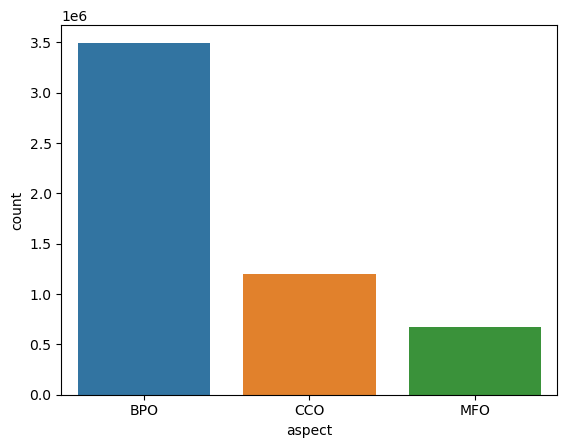

In [30]:
sns.countplot(x = train_terms['aspect'])

**Information Accretion Distributions**

In [31]:
IA_df

,Information Accreation
GO:0000001,0.000000
GO:0000002,3.103836
GO:0000003,3.439404
GO:0000011,0.056584
GO:0000012,6.400377
...,...
GO:2001083,7.159871
GO:2001084,7.592457
GO:2001085,7.159871
GO:2001147,5.554589


<Axes: >

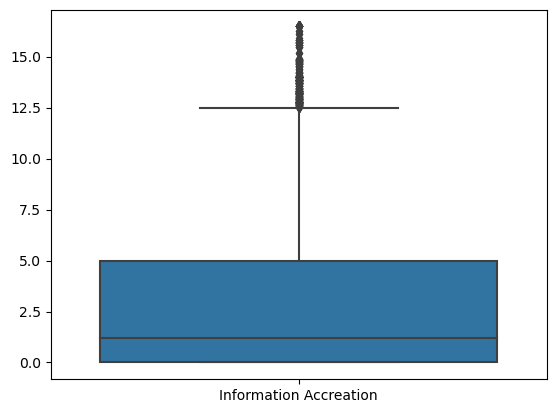

In [32]:
sns.boxplot(IA_df)
# print(IA_df.value_counts())

**Sequence Lengths of Fasta 

/tmp/ipykernel_505/3183592557.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sequence_lengths, kde = False)


,SeqLen
count,142246.000000
mean,553.636679
std,641.728770
min,3.000000
25%,248.000000
50%,411.000000
75%,654.000000
max,35375.000000


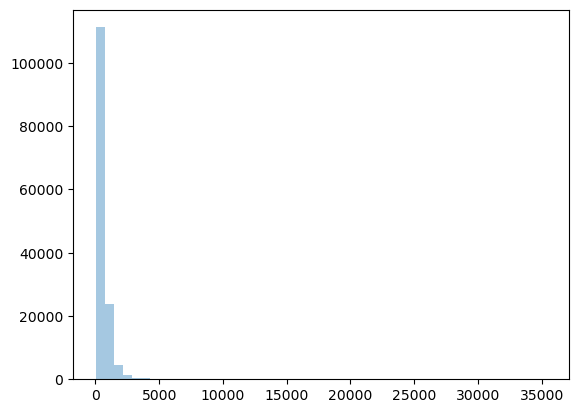

In [33]:
sequence_lengths = []
reduced_length   = 10001
for protein in train_fasta_dict.keys():
    length_seq   = len(train_fasta_dict[protein])
    sequence_lengths.append(length_seq)
    
sns.distplot(sequence_lengths, kde = False)
pd.DataFrame(sequence_lengths, columns = ['SeqLen']).describe()

**Likely Direction 25 Apr 2023**
1. Since each Gene Ontology has relationships to other gene ontologies, finding a meaningful way to encode the ontology and it's relationships
2. Additionally... considering a point of where is too much information since these trees are all theoretically connected

In [34]:
# Assuming df is your dataframe
# Sum across rows for each column (label)
# label_sums = train_labels.sum(axis=0)

# # Plot the distribution
# plt.figure(figsize=(10, 6))
# sns.histplot(label_sums, bins=50)
# plt.xlabel('Number of Occurrences')
# plt.ylabel('Number of Labels')
# plt.title('Distribution of Label Occurrences')
# plt.show()

# Section 3: Inspecting Ontology Graphs

**Make OBO Graph**

In [35]:
# import networkx
# knowledge_graph    = networkx.DiGraph()

# counter   = 0
# for term in gene_ontology.terms():
#     if counter < 3:
#       knowledge_graph.add_node(term.id)

#       #iterate through subclasses
#       for subclass in term.subclasses():
#           knowledge_graph.add_edge(term.id, subclass)

#       #iterate through superclasses
#       for superclass in term.superclasses():
#           knowledge_graph.add_edge(term.id, superclass)

#     counter += 1


In [36]:
# networkx.draw(knowledge_graph, pos=graphviz_layout(knowledge_graph, prog="dot"), with_labels=False, arrows=True)

In [37]:
# graphviz_layout(knowledge_graph)

# Machine Learning Section


---
1. Every protein has a network of relations with other proteins as seen by the OBO format. 
2. Go up and down the tree 3 branches and determine if has relationship (encode in a sparse matrix)
3. Could Create 4 Dimensional Tensors to represent an ontology and it's superclass and subclass
4. Superlcass, Subclass, and Ontology stacked in a another dimensions so that all objects are in one structure
5. Think back to tensorflow how we could create a 4D tensor for data preprocessing (images have 3 dims, and then an extra dimension to put them together --> likely could use a similar machine learning technique too. 
6. Might have to stack a couple nueral networks together... FASTA data needs to be incorporated as well in a meaningful manner
7. Predicting the probability of each GO term from sequence and features we extract; multiple GO terms can be associated with a protein.


# Main WorkFlow

**Tokenizer Gene Ontology Terms**

In [12]:
joined_terms  = train_terms['term'].unique()
GO_encoded    = pd.factorize(joined_terms)[0]
GO_labels     = pd.factorize(joined_terms)[1]
GO_dictionary = {GO_labels[index]: GO_encoded[index] for index in range(len(GO_labels))}

**One Hot Encoding Targets**
1. Necessary for this problem since there's multiple labels that can be assigned to a protein

In [13]:
GO_encoder    = OneHotEncoder()
GO_dict_array = np.array(list(GO_dictionary.values())).reshape(-1,1)
GO_encoder.fit(GO_dict_array)

OneHotEncoder()

# Next Steps
1. All GO's are Targets (Binary Classificaiton Output Layer with len(all gene ontologies)
2. Sigmoid activation function telling whether gene ontology is associated with protein

In [14]:
import sys

# Define your variable

# Get the memory size of the variable
size = sys.getsizeof(train_fasta_dict)

print(f"The memory size of my_variable is {size} bytes.")

The memory size of my_variable is 5242968 bytes.


In [15]:
# Uniprot Protein ID for each Ontology_dict Term
with open('protein_seq.pckl', 'rb') as file:
    protein_seq = pickle.load(file)

# Protein ID extended with gene ontologies
with open('ontology_dict.pckl', 'rb') as f:
    ontology_dict = pickle.load(f)

# GO_dictionary = {}

for protein in ontology_dict.keys():
    encoded_proteins   =   []
    for GO  in list(ontology_dict[protein][0]):
        categorized_GO = GO_dictionary[GO]
        encoded_proteins.append(categorized_GO)
    
    ontology_dict[protein] = encoded_proteins   
    
# Formatting Ontology Dict Compilation Takes 20 Minutes this is faster
# ontology_dict = {protein_seq[index]: list(ontology_dict.values())[index] \
#                  for index in range(len(list(ontology_dict.values())))}

In [16]:
# rm -r test_labels.pckl

In [17]:
num_of_labels = 1500 

with ZipFile('cafa_train_test_embeddings.zip', 'r') as zips:
    print(zips.namelist())
    with zips.open(zips.namelist()[0]) as file:
        x_test = np.load(file)
    
    with zips.open(zips.namelist()[1]) as file:
        y_test = np.load(file)
        
    with zips.open(zips.namelist()[2]) as file:
        x_train = np.load(file)
        
    with zips.open(zips.namelist()[3]) as file:
        y_train = np.load(file)
      

    
# Take value counts in descending order and fetch first 1500 `GO term ID` as labels
# labels = train_terms['term'].value_counts().index[:num_of_labels].tolist()

['test_embeds.npy', 'test_ids.npy', 'train_embeds.npy', 'train_ids.npy']


**Load Test Embeddings**

In [18]:
# y_test.to_hdf('test_labels2.h5', 'y_test')

**Create Embedded Labels (Test or Train)**

In [19]:
# Creates the Embeddings Using a pretrained Embedding
# Nueral Network for Protein Sequences

# Creates the Embeddings Using a pretrained Embedding
# Nueral Network for Protein Sequences

def create_embeddings(data, fasta_dict):
    # data: the actual data that needs to be transformed
    # fasta_dict: the names for the protein data set for the 
    
    # Filter Most Common Labels
    labels             = train_terms['term'].value_counts().index[:num_of_labels].tolist()
    
    bar                = progressbar.ProgressBar(maxval=num_of_labels, \
    widgets            = [progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

    bar.start()
    # Create an empty dataframe of required size for storing the labels,
    # i.e, train_size x num_of_labels (142246 x 1500)
    train_size         = train_taxonomy.shape[0]    # len(X)
    
                                           # For some reaosn test_fast_dict is one less than
                                           # the test set size
            
    protein_labels     = np.zeros((train_size ,num_of_labels))

    # Convert from numpy to pandas series for better handling
    series_protein_ids = pd.Series(train_taxonomy['EntryID'])


    # Loop through each label
    for i in range(num_of_labels):

        # For each label, fetch the corresponding train_terms data
        n_train_terms = train_terms[train_terms['term'] ==  labels[i]]
        
        # Fetch all the unique EntryId aka proteins related to the current label(GO term ID)
        label_related_proteins = n_train_terms['EntryID'].unique()

        # In the series_train_protein_ids pandas series, if a protein is related
        # to the current label, then mark it as 1, else 0.
        # Replace the ith column of train_Y with with that pandas series.
        
#         print(label_related_proteins.shape, series_protein_ids.shape)
        protein_labels[:,i] =  series_protein_ids.isin(label_related_proteins).astype(float)

        # Progress bar percentage increase
        bar.update(i+1)

    # Notify the end of progress bar 
    bar.finish()

    # Convert train_Y numpy into pandas dataframe
    labels_df = pd.DataFrame(data = protein_labels, columns = labels)

    
    return labels_df


# test_labels   = create_embeddings(y_test, protein_test_labels)
# train_labels  = create_embeddings(y_train, protein_train_labels)

In [20]:
# train_labels.to_hdf('train_labels.h5', key = 'y_train', mode = 'w')
# test_labels.to_hdf('test_labels.h5',   key = 'y_test',  mode = 'w')

train_labels = pd.read_hdf('train_labels.h5')
test_labels  = pd.read_hdf('test_labels.h5')

In [ ]:
# @remote(instance_type="ml.g4dn.xlarge") # Decorator to Use Differnet Instance
def nueral_network(dropout, lr, nueronPct, nueronShrinkage):
    
    history_training[training_count] = []
    kfolds = 5
    
    skf    = KFold(n_splits = kfolds, shuffle = True, random_state = SEED)
    
    hyperparameters                    = {}
    hyperparameters['dropout']         = dropout
    hyperparameters['lr']              = lr
    hyperparameters['nueronPct']       = nueronPct
    hyperparameters['nueronShrinkage'] = nueronShrinkage
    
    
    
    # Define A Nueral Network Loop
    nueron_max_size       = 5000
    nueron_start_size     = int(nueronPct * nueron_max_size)
    max_layers            = 20
    min_layer_size        = 16
    layer_count           = 0
    max_layers            = 10
    BATCH_SIZE            = 128
    
    truncated_size        = 2000
    
    
    model       = tf.keras.models.Sequential()
    input_layer = tf.keras.layers.Dense(nueron_start_size, input_shape=(x_train.shape[1],),
                                       activation = 'relu')
    model.add(input_layer)
    
    while layer_count < max_layers and nueron_start_size > min_layer_size:
        
        nueron_start_size = int(nueron_start_size * nueronPct)
        layer_dense       = tf.keras.layers.Dense(nueron_start_size, activation = 'relu')
        model.add(layer_dense)
        
        layer_count      += 1
        
        
    final_layer        = tf.keras.layers.Dense(y_train.shape[1], activation ='sigmoid')
    model.add(final_layer)
    
    AdamOpt            = Adam(learning_rate = hyperparameters['lr'])
    model.compile(metrics = 'binary_crossentropy', optimizer = AdamOpt, 
                                          loss = 'binary_crossentropy')
    
    history            = model.fit(x_train[:truncated_size], y_train[:truncated_size],
                            epochs = 4, batch_size = BATCH_SIZE)
    
    history_training[training_count].append(history)
    
    predictions        = model.predict(x_test)
    y_test_trunc       = np.array(y_test)
    
    scores_matrix      = np.zeros(shape = (predictions.shape[0], predictions.shape[1]))
    scores_per_protein = np.zeros(shape = (predictions.shape[0]))
    
    
    # Analyze Accuracy Element By Elemnt
    # Assign Accuracy per protein
#     print(predictions.shape[0]-1, y_test_trunc.shape[0])
    bar                = progressbar.ProgressBar(maxval=predictions.shape[0], \
    widgets            = [progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()

    # Print available memory in GB
    print(f"Available Memory: {mem.available / (1024 ** 3)} GB")
    
    for pred in range(predictions.shape[0]-1):
        for item in range(predictions.shape[1]):
            equality = (y_test_trunc[pred][item] == predictions[pred][item])
            scores_matrix[pred][item] = equality
            
        total_entries = scores_matrix.shape[1]
        total_correct = np.count_nonzero(scores_matrix[pred])
        accuracy      = total_correct / total_entries
        
        scores_per_protein[pred] = accuracy
        bar.update(pred+1)

    # Notify the end of progress bar 
    bar.finish()
    
    # Assign Total Accuracy
    total_accuracy  = np.average(scores_per_protein)
        
    
    return total_accuracy

**Call Hyperparameter Optimization... GPU would likely help**

In [48]:
# history_training = {}
# training_count   = 0

# pbounds          = {
#                  'dropout': (0.0, 0.5),
#                  'lr': (0.001, 0.1),
#                  'nueronPct': (0.1, 1),
#                  'nueronShrinkage': (0.1, 1)
#                  }

# SEED             = 1234

# optimizer = BayesianOptimization(
#     f = nueral_network,
#     pbounds = pbounds,
#     verbose = 2,
#     random_state = SEED
# )

# optimizer.maximize(init_points = 1, n_iter = 3)

# Section 4: Ngrams Sequence Model Training Approach

---



**Transform Tokenizing Dict for 3 Letter Amino Words**

In [9]:
import psutil

# Get memory usage information in bytes
mem = psutil.virtual_memory()

# Print total memory in GB
print(f"Total Memory: {mem.total / (1024 ** 3)} GB")

# Print available memory in GB
print(f"Available Memory: {mem.available / (1024 ** 3)} GB")

Total Memory: 15.324687957763672 GB
Available Memory: 10.309249877929688 GB


**ProtTrans Protein Language Model Embedding**

In [50]:
# !pip install transformers

In [51]:
# !pip install torch==2.0.0+cpu torchvision==0.15.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html


In [52]:
# !pip install sentencepiece

**Embedding X variable (Training Sequences) Into More Meantingful Pretrained NN**

In [53]:
# from transformers import T5Tokenizer, T5EncoderModel
# import torch

# device    = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# # Load the tokenizer
# tokenizer = T5Tokenizer.from_pretrained('Rostlab/prot_t5_xl_half_uniref50-enc', do_lower_case=False)

# # Load the model
# model     = T5EncoderModel.from_pretrained("Rostlab/prot_t5_xl_half_uniref50-enc")

# # only GPUs support half-precision currently; if you want to run on CPU use full-precision (not recommended, much slower)
# # model.full() if device=='cpu' else model.half()

# if device.type=='cpu':
#     model = model.float()
# else:
#     model = model.half()

# # prepare your protein sequences as a list
# sequence_examples = list(train_fasta_dict.values())

# # replace all rare/ambiguous amino acids by X and introduce white-space between all amino acids
# max_length        = 1500
# sequence_examples = [" ".join(list(re.sub(r"[UZOB]", "X", sequence))) for sequence in sequence_examples]

# sequence_examples = [sequence[:max_length] for sequence in sequence_examples]

# # set batch size
# batch_size = 16
# batches    = [sequence_examples[i:i + batch_size] for i in range(0, len(sequence_examples), batch_size)]

# embeddings = []

# for batch in batches:
#     # tokenize sequences and pad up to the longest sequence in the batch
#     ids = tokenizer.batch_encode_plus(batch, add_special_tokens=True, padding='max_length', max_length = 1500)

#     input_ids      = torch.tensor(ids['input_ids']).to(device)
#     attention_mask = torch.tensor(ids['attention_mask']).to(device)

#     # generate embeddings
#     with torch.no_grad():
#         embedding_repr = model(input_ids=input_ids,attention_mask=attention_mask)
        
#     # per-protein embeddings by taking the mean along sequence dimension
#     per_protein_embeddings = embedding_repr.last_hidden_state.mean(dim=1).cpu().numpy()
    
#     embeddings.append(per_protein_embeddings)

# # concatenate all embeddings
# embeddings = np.concatenate(embeddings)

# # tokenize sequences and pad up to the longest sequence in the batch
# ids = tokenizer.batch_encode_plus(sequence_examples, add_special_tokens=True, padding="longest")

# input_ids      = torch.tensor(ids['input_ids']).to(device)
# attention_mask = torch.tensor(ids['attention_mask']).to(device)

# # generate embeddings
# with torch.no_grad():
#     embedding_rpr = model(input_ids=input_ids,attention_mask=attention_mask)

# # extract residue embeddings for the first ([0,:]) sequence in the batch and remove padded & special tokens ([0,:7]) 
# emb_0 = embedding_repr.last_hidden_state[0,:7] # shape (7 x 1024)
# # same for the second ([1,:]) sequence but taking into account different sequence lengths ([1,:8])
# emb_1 = embedding_repr.last_hidden_state[1,:8] # shape (8 x 1024)

# # if you want to derive a single representation (per-protein embedding) for the whole protein
# emb_0_per_protein = emb_0.mean(dim=0) # shape (1024)

**Embedding using Facebooks ESM Model**

In [22]:
!pip install torch fairseq

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 94.4 MB/s eta 0:00:00ta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 2.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 41.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 132.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.4 MB/s eta 0:00:0000:0100:01
  Created wheel for fairseq: filename=fairseq-0.12.2-cp310-cp310-linux_x86_64.whl size=103

In [23]:
!pip install torch==2.0.0 -f https://download.pytorch.org/whl/cu110/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in links: https://download.pytorch.org/whl/cu110/torch_stable.html
  Using cached torch-2.0.0-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1
    Uninstalling torch-2.0.1:
      Successfully uninstalled torch-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2 requires torch==2.0.1, but you have torch 2.0.0 which is incompatible.


In [24]:
!wget -c https://dl.fbaipublicfiles.com/fair-esm/models/esm1b_t33_650M_UR50S.pt

--2023-08-20 16:24:29--  https://dl.fbaipublicfiles.com/fair-esm/models/esm1b_t33_650M_UR50S.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.165.83.79, 18.165.83.35, 18.165.83.44, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.165.83.79|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [25]:
!pip install fair-esm

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 1.9 MB/s eta 0:00:00:00:01


In [14]:
data        = {}
prot_labels = list(train_fasta_dict.values())
for index in range(len(protein_train_labels)):
    data[protein_train_labels[index]] = prot_labels[index]
    
data        = list(data.items())

In [16]:
import torch
import esm

# Load ESM-1b model
model, alphabet = esm.pretrained.esm1b_t33_650M_UR50S()
batch_converter = alphabet.get_batch_converter()

# Convert sequences to model input
batch_labels, batch_strs, batch_tokens = batch_converter(data)

# Get embeddings
all_results = []
bar                = progressbar.ProgressBar(maxval=len(data), \
widgets            = [progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()
counter            = 0 
with torch.no_grad():
    
    
    results = model(batch_tokens, repr_layers=[33], return_contacts=False)
    all_results.append(results)
    
    coun
    bar.update(counter+1)

    # Notify the end of progress bar 
bar.finish()
    
    
# Extract the representation from layer 33 for the first protein
token_representations = results["representations"][33]


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf

# input_dim     = [x_train.shape[1]]   # 8000 Biological Work Combinations 20^3 (20 Aminos) + OOV + IDK
embedding_dim = 16

input_dim     = (x_train.shape[1],)

model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=input_dim),    
    tf.keras.layers.Dense(units=64, activation='relu'),
#     tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(units = 32, activation = 'relu'),
#     tf.keras.layers.Dense(units=64, activation='relu'),
#     tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(units=num_of_labels, activation='sigmoid')
])


# model = tf.keras.Sequential([
#     # Start with 1D Convolutional layers
#     tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=input_dim),
#     tf.keras.layers.Conv1D(64, kernel_size=5, activation='relu'),
#     tf.keras.layers.MaxPooling1D(pool_size=2),
    
#     tf.keras.layers.Conv1D(64, kernel_size=5, activation='relu'),
#     tf.keras.layers.MaxPooling1D(pool_size=2),

#     # Flattening the 1D convolutional output to feed it to dense layers
#     tf.keras.layers.Flatten(),
    
#     # Follow with Dense layers as per your original design
#     tf.keras.layers.Dense(units=128, activation='relu'),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Dense(units=64, activation='relu'),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Dense(units=num_of_labels, activation='sigmoid')
# ])


optimizer               = tf.keras.optimizers.Adam(learning_rate = 0.00005)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.build()
model.summary()

In [ ]:
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, Add, Dropout, Flatten, Dense
from tensorflow.keras.models       import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks    import EarlyStopping

def residual_block(data, filters, d_rate):

    shortcut = data

    bn1 = tf.keras.layers.BatchNormalization()(data)
    act1 = Activation('relu')(bn1)
    conv1 = Conv1D(filters, 1, dilation_rate=d_rate, padding='same', kernel_regularizer=l2(0.001))(act1)

    #bottleneck convolution
    bn2 = BatchNormalization()(conv1)
    act2 = Activation('relu')(bn2)
    conv2 = Conv1D(filters, 3, padding='same', kernel_regularizer=l2(0.001))(act2)

    #skip connection
    x = Add()([conv2, shortcut])

    return x

In [ ]:
x_input = tf.keras.layers.Input(shape=(x_train.shape[1],1))

#initial conv
conv = tf.keras.layers.Conv1D(64, 1, padding='same')(x_input) 

# per-residue representation
res1 = residual_block(conv, 64, 2)
res2 = residual_block(res1, 64, 3)

x    = tf.keras.layers.MaxPooling1D(3)(res2)
x    = Dropout(0.5)(x)

# softmax classifier
x    = Flatten()(x)
x_output = Dense(1500, activation='sigmoid', kernel_regularizer=l2(0.0001))(x)

model_CNN = Model(inputs=x_input, outputs=x_output)
model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

model_CNN.summary()

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model_CNN.fit(
    x_train, np.array(train_labels),
    epochs=10, batch_size=64,
    validation_split = 0.2,
    callbacks=[es]
    )

In [ ]:
# @remote(instance_type="ml.g4dn.xlarge") # Decorator to Use Differnet Instance
def train_nueral_net():
    epochs             = 20
    batch_size         = 32

    history            = model.fit(x_train, np.array(train_labels), epochs = epochs, \
                         batch_size = batch_size, validation_split = 0.2, verbose = 1)
    
    return history, model

# history, model = train_nueral_net()

In [ ]:
x_train.shape

In [ ]:
train_labels

In [ ]:
pd_pred

In [ ]:
pd_pred = pd.DataFrame(predictions)
pd_pred[2].describe()

In [ ]:
predictions        =  model.predict(x_test)
y_test             =  np.array(test_labels)

# scores_matrix      = np.zeros(shape = (predictions.shape[0], predictions.shape[1]))
# scores_per_protein = np.zeros(shape = (predictions.shape[0]))

# bar                = progressbar.ProgressBar(maxval=predictions.shape[0], \
# widgets            = [progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
# bar.start()

# for pred in range(predictions.shape[0]-1):
#     for item in range(predictions.shape[1]):
        
#         equality = (y_test[pred][item] == predictions[pred][item])
#         scores_matrix[pred][item] = equality

#     total_entries = scores_matrix.shape[1]
#     total_correct = np.count_nonzero(scores_matrix[pred])
#     accuracy      = total_correct / total_entries

#     scores_per_protein[pred] = accuracy
#     bar.update(pred+1)

# # Notify the end of progress bar 
# bar.finish()


In [ ]:
# @remote(instance_type="ml.r5.2xlarge") # Decorator to Use Differnet Instance
def create_submission_df():
    
    GO_labels           = train_terms['term'].value_counts().index[:num_of_labels].tolist()

    predictions_df      = pd.DataFrame(predictions[:-1], index=protein_test_labels, columns=GO_labels)
    final_submission_df = predictions_df.reset_index().melt(id_vars='index', var_name='GO_labels', value_name='predictions')
    
#     final_submission_df   = pd.DataFrame()
#     predictions_df = pd.DataFrame(predictions[:-1], index = protein_test_labels, columns = GO_labels)
    
#     for index in predictions_df.index:
#         final_submission_df = pd.concat([final_submission_df, predictions_df.loc[index]])
    
    return final_submission_df

submission = create_submission_df()

In [ ]:
# unique_proteins = submission['index'].unique()

In [ ]:
# sort_submission = pd.DataFrame()
# sort_submission['']

def sort_submission(submission):

    submission   = submission.sort_values(by = 'index')
        
    return submission


sorted_submission = sort_submission(submission)


In [ ]:
sorted_submission.to_hdf('submission_draft.h5', key = 'data')

In [ ]:
sorted_submission = pd.read_hdf('submission_draft.h5', key = 'data')

In [ ]:
sorted_submission.to_csv('submission.tsv', sep = '\t')

In [ ]:
def upload_s3_file(file_name):
    
    file_name = file_name
    
    return

s3        = boto3.resource('s3')
# file_name = 't5embeds.zip'
# y_train   = 'labels_df.pckl'
s3.meta.client.upload_file('submission.tsv', bucket_name, 'submission.tsv')
# s3.meta.client.upload_file('labels_df.h5',   bucket_name, 'labels_df.h5')

# s3.meta.client.upload_file('train_labels.h5', bucket_name, 'train_labels.h5')
# s3.meta.client.upload_file('test_labels.h5', bucket_name, 'test_labels.h5')

In [ ]:
pd.Series(scores_per_protein).plot(kind = 'box')

# Protein-Bert Model Creation

---
1. Need to tokenize amino acids (0-19).



In [ ]:
!pip install protein-bert

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from proteinbert import OutputType, OutputSpec, FinetuningModelGenerator, load_pretrained_model, finetune, evaluate_by_len
from proteinbert.conv_and_global_attention_model import get_model_with_hidden_layers_as_outputs

**Pre Trained Model Weights**

In [ ]:
!wget ftp://ftp.cs.huji.ac.il/users/nadavb/protein_bert/epoch_92400_sample_23500000.pkl

**Tokenize Each Amino Acid**

In [ ]:
Amino_tokenizer  = Tokenizer(char_level = True)
joined_sequences = list(train_fasta_dict.values())[0:10001]
Amino_tokenizer.fit_on_texts(joined_sequences)

**Creating the Model**
1. Protein Bert Takes in Amino Acids Seq as Input because the tokenizing has to match up with the original tokenization it was trained on
2. The Output settings at the beginning must adjusted to the task

In [ ]:
BENCHMARK_NAME = 'signalP_binary'

# A local (non-global) binary output
OUTPUT_TYPE    = OutputType(False, 'categorical')  # Categorical Gene ONtologies
UNIQUE_LABELS  = range(10001)                      # Tokenizer Terms 10001
OUTPUT_SPEC    = OutputSpec(OUTPUT_TYPE, UNIQUE_LABELS)


# train_set_file_path = os.path.join(BENCHMARKS_DIR, '%s.train.csv' % BENCHMARK_NAME)
# train_set = pd.read_csv(train_set_file_path).dropna().drop_duplicates()
x_train, x_val, y_train, y_val = train_test_split(joined_sequences, go_encoded, test_size = 0.15, random_state = 0)

# test_set_file_path = os.path.join(BENCHMARKS_DIR, '%s.test.csv' % BENCHMARK_NAME)
# test_set = pd.read_csv(test_set_file_path).dropna().drop_duplicates()

# print(f'{len(train_set)} training set records, {len(valid_set)} validation set records, {len(test_set)} test set records.')


# Loading the pre-trained model and fine-tuning it on the loaded dataset

pretrained_model_generator, input_encoder = load_pretrained_model()

# get_model_with_hidden_layers_as_outputs gives the model output access to the hidden layers (on top of the output)
model_generator = FinetuningModelGenerator(pretrained_model_generator, OUTPUT_SPEC, pretraining_model_manipulation_function = \
        get_model_with_hidden_layers_as_outputs, dropout_rate = 0.5)

training_callbacks = [
    keras.callbacks.ReduceLROnPlateau(patience = 1, factor = 0.25, min_lr = 1e-05, verbose = 1),
    keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True),
]

finetune(model_generator, input_encoder, OUTPUT_SPEC, x_train, y_train, x_val, y_val, \
        seq_len = 512, batch_size = 16, max_epochs_per_stage = 40, lr = 1e-04, begin_with_frozen_pretrained_layers = True, \
        lr_with_frozen_pretrained_layers = 1e-02, n_final_epochs = 1, final_seq_len = 1024, final_lr = 1e-05, callbacks = training_callbacks)




In [ ]:
# Evaluating the performance on the test-set

results, confusion_matrix = evaluate_by_len(model_generator, input_encoder, OUTPUT_SPEC, test_fasta_dict, test_se, \
        start_seq_len = 512, start_batch_size = 32)

print('Test-set performance:')
display(results)

print('Confusion matrix:')
display(confusion_matrix)